# exploring sqlite + pandas as client side relational database with pandas dataframes

## Part 1: using sqlite3 to connect to, add data, and query from a database

In [ ]:
import sqlite3

In [5]:
#check version of sqlite3 installed
print (sqlite3.version)
print (sqlite3.sqlite_version)

2.6.0
3.35.4


In [61]:
#creates a database in local memory
db = sqlite3.connect(':memory:')

In [62]:
#cursor allows for commands to pass to db
cursor = db.cursor()

In [63]:
cursor

In [22]:
#create sample table 'books' with 5 columns
cursor.execute('''
create table books (id integer primary key, title text, author text, price float, year text)
''')

db.commit()

OperationalError: table books already exists

In [16]:
#demo adding columns with sqlite
cursor.execute('''
alter table books add column price text
''')

db.commit()

In [17]:
cursor.execute('''
alter table books add column year text
''')

db.commit()

In [18]:
#adding 2 rows of data to 'books'
cursor.execute('''
insert into books values (1, 'Pro Powershell', 'Justin Lee', 35.00, 2015)
''')

cursor.execute('''
insert into books values (2, "'Hitchhiker's Guide to the Galaxy", 'Douglas Adams', 12.00, 199)
''')

db.commit()

In [20]:
#select * from books and print to display. the output is type 'list' and not a dataframe
listbooks = cursor.execute('''select * from books;''').fetchall()
db.commit()
print(listbooks)
type(listbooks)

[(1, 'Pro Powershell', 'Justin Lee', '35.0', '2015'), (2, "'Hitchhiker's Guide to the Galaxy", 'Douglas Adams', '12.0', '199')]


list

## Part 2: combining sqlite and pandas to use a dataframe instead of list

In [21]:
import sqlite3
import pandas as pd

#convert query results as a dataframe
dfbooks = pd.read_sql_query("select * from books;", db)
dfbooks.head()

,id,title,author,price,year
0,1,Pro Powershell,Justin Lee,35.0,2015
1,2,'Hitchhiker's Guide to the Galaxy,Douglas Adams,12.0,199


## Part 3: using sqlite to drop table

In [64]:
cursor = db.cursor()
cursor.execute('''drop table books''')
db.commit()

OperationalError: no such table: books

In [24]:
booksdf = cursor.execute('''select * from books;''').fetchall()
db.commit()

OperationalError: no such table: books

## Part 4: using sqlite to connect to 'chinook' sample database
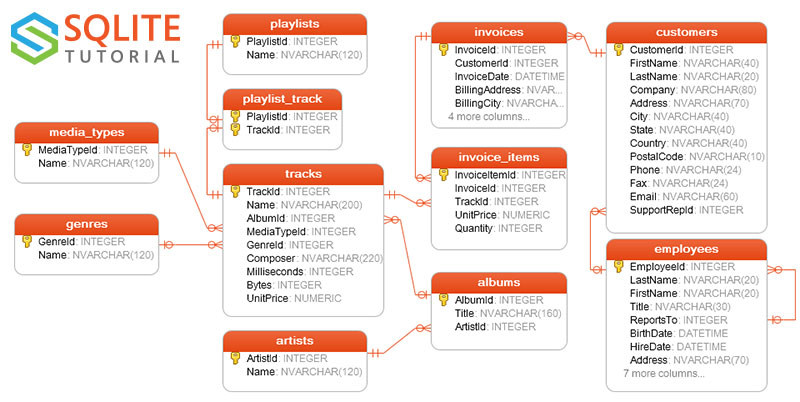

In [65]:
#connect to chinook db, create cursor, and query data
chiconn = sqlite3.connect("chinook.db")
chicur = chiconn.cursor()

albums = chicur.execute("""select * from albums order by title limit 3;""").fetchall()
print(albums)

[(156, '...And Justice For All', 50), (257, '20th Century Masters - The Millennium Collection: The Best of Scorpions', 179), (296, 'A Copland Celebration, Vol. I', 230)]


In [38]:
type(albums)

list

### now performing the same query but with pandas so that we can use a dataframe instead of list

In [40]:
import sqlite3
import pandas as pd

dfalbum = pd.read_sql_query("select * from albums order by title limit 3;", chiconn)
dfalbum.head()

,AlbumId,Title,ArtistId
0,156,...And Justice For All,50
1,257,20th Century Masters - The Millennium Collecti...,179
2,296,"A Copland Celebration, Vol. I",230


In [49]:
#print the names of tables in chinook db
dftablelist = pd.read_sql_query("select name from sqlite_master where type = 'table';", chiconn)
print(dftablelist)

               name
0            albums
1   sqlite_sequence
2           artists
3         customers
4         employees
5            genres
6          invoices
7     invoice_items
8       media_types
9         playlists
10   playlist_track
11           tracks
12     sqlite_stat1


In [51]:
dfalbum.dtypes

AlbumId      int64
Title       object
ArtistId     int64
dtype: object

In [52]:
dftablelist.dtypes

name    object
dtype: object

## Part 5: final query and suppressing the left hand index column

In [53]:
finqry = '''
select tra.name as Song, alb.title as Album, art.name as Artist
from tracks tra
join albums alb on alb.albumid = tra.albumid
join artists art on art.artistid = alb.artistid
order by Artist, Album
'''

#adding index_col parameter to use Artist field as the index
#also passing finqry as an input to read_sql_query
pd.read_sql_query(finqry, chiconn, index_col = 'Artist') 

,Song,Album
Artist,,
AC/DC,For Those About To Rock (We Salute You),For Those About To Rock We Salute You
AC/DC,Put The Finger On You,For Those About To Rock We Salute You
AC/DC,Let's Get It Up,For Those About To Rock We Salute You
AC/DC,Inject The Venom,For Those About To Rock We Salute You
AC/DC,Snowballed,For Those About To Rock We Salute You
...,...,...
Zeca Pagodinho,Sapopemba e Maxambomba,Ao Vivo [IMPORT]
Zeca Pagodinho,Minha Fé,Ao Vivo [IMPORT]
Zeca Pagodinho,Lua de Ogum,Ao Vivo [IMPORT]


### Closing sqlite DB Connections

In [66]:
chicur.close()
chiconn.close()

## Part 6: Example connection to postgresql

In [ ]:
import psycopg2 as pg
import pandas.io.sql as psql

#example connection to postgre server
pgreconn = pg.connect("dbname = prod user = BLANK password = BLANK")